<style>
  body {
    margin: 0;
    padding: 0;
    font-family: Arial, sans-serif;
  }

  /* Linha das logos usando table layout */
  .cover-header {
    display: table;
    width: 100%;
    margin-top: 20px;
    table-layout: fixed;
  }

  .cover-header .left{
    display: table-cell;
    width: 20%;
    vertical-align: middle;
    text-align: center;
  }
  .cover-header .right {
    display: table-cell;
    width: 30%;
    vertical-align: middle;
    text-align: center;
  }

  .cover-header .center {
    display: table-cell;
    width: 50%;
    text-align: center;
    vertical-align: middle;
  }

  .cover-header img {
    max-height: 55px;
    width: auto;
    display: inline-block;
  }

  /* Texto institucional embaixo das logos */
  .cover-center {
    text-align: center;
    margin-top: 20px;
    vertical-align: middle;
  }

  .cover-center p {
    text-align: center;
    vertical-align: middle;
    margin: 0;
    font-weight: 700;
    line-height: 1.4;
    font-size: 16px;
  }

  /* Título e autor */
  .cover-title {
    margin-top: 120px;
    text-align: center;
  }

  .cover-title h1 {
    font-size: 28px;
    margin-bottom: 60px;
  }

  .cover-title .author {
    font-size: 18px;
    margin-top: 160px; /* nome bem mais abaixo */
  }

  /* Rodapé fixo */
  .cover-footer {
    position: absolute;
    bottom: 30px;
    left: 0;
    width: 100%;
    text-align: center;
    font-size: 14px;
  }

  .cover-footer {
  position: absolute;
  bottom: 30px;
  left: 0;
  width: 100%;
  text-align: center;
  font-size: 14px;
}

</style>

<div class="cover-header">
  <div class="left">
    <img src="Imagens/logo_virtus2.png" alt="Logo VIRTUS">
  </div>
  <div class = "center"></div>
  <div class="right">
    <img src="Imagens/logo_ufcg.png" alt="Logo UFCG">
  </div>
</div>

<div class="cover-center">
  <p>
    UNIVERSIDADE FEDERAL DE CAMPINA GRANDE<br>
    CENTRO DE CIÊNCIAS E TECNOLOGIA<br>
    CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁTICA<br>
    CENTRO DE COMPETÊNCIAS EMBRAPII VIRTUS-CC
  </p>
</div>

<div class="cover-title">
  <h1>Filtros digitais</h1>
  <p class="author">Jezrael Pereira Filgueiras</p>
</div>

<div class="cover-footer">
  Campina Grande, 29 de setembro de 2025
</div>

<div style="page-break-after: always;"></div>

<style>
#toc ol {
  counter-reset: item;
  list-style-type: none;
  padding-left: 1.2em;
}
#toc li {
  display: block;
}
#toc li:before {
  content: counters(item, ".") " ";
  counter-increment: item;
}
</style>

<div id="toc">
  <h2>Sumário</h2>
  <ol>
    <li><a href="#1-introdução">Introdução</a></li>
    <li>
      <a href="#2-desenvolvimento">Desenvolvimento</a>
      <ol>
          <li><a href="#21-hamming">Janelas de Hamming</a></li>
          <li><a href="#22-butterworth">Aproximação de Butterworth</a></li>
      </ol>
    </li>
    <li>
      <a href="#3-resultados-e-discussões">Resultados e discussões</a>
      <ol>
        <li><a href="#31-hamming">Janelas de Hamming</a></li>
        <li><a href="#32-butterworth">Aproximação de Butterworth</a></li>
      </ol>
    </li>
    <li><a href="#conclusao">Conclusão</a></li>
    <li><a href="#referencias">Referências</a></li>
  </ol>
</div>

<div style="page-break-after: always;"></div>

<a id="1-introdução"></a>
# 1. Introdução

No processamento digital de sinais, a filtragem é uma das operações mais fundamentais, pois permite modificar seletivamente o conteúdo espectral de um sinal. Através de filtros digitais, é possível atenuar ruídos indesejados, realçar determinadas faixas de frequência ou mesmo separar componentes específicos de um sinal. Esses filtros podem ser classificados em duas grandes categorias: os de resposta finita ao impulso (FIR) e os de resposta infinita ao impulso (IIR).  

Os filtros FIR apresentam como característica principal a estabilidade incondicional e a possibilidade de se obter uma resposta em fase linear, o que é desejável em diversas aplicações. Contudo, em geral, exigem ordens mais elevadas para atingir especificações rígidas, o que implica maior custo computacional. Já os filtros IIR, por explorarem polos em sua função de transferência, conseguem atender a requisitos de seletividade com ordens menores, mas apresentam desafios relacionados à estabilidade e à distorção de fase.  

No contexto deste estudo, são exploradas duas abordagens clássicas de projeto: o método das janelas, utilizando a janela de Hamming para a implementação de um filtro FIR passa‑baixas, e a aproximação de Butterworth para a implementação de um filtro IIR passa‑altas.


<a id="2-desenvolvimento"></a>
# 2. Desenvolvimento

<a id="21-hamming"></a>
## 2.1 Filtro FIR - Janelas de Hamming

### Função Janela de Hamming

A função janela de Hamming generralizada é definida como:

\begin{equation}
w_H(n) = 
\begin{cases} 
\alpha + (1 - \alpha) \cos\left(\frac{2\pi n}{M}\right), & \text{para } |n| \leq \frac{M}{2}, \\\\
0, & \text{para } |n| > \frac{M}{2}
\end{cases} \tag{2.1}
\end{equation}

Onde $M$ é o comprimento total da janela em número de amostras, e com $0<\alpha<1$. Para $\alpha = 0.54$, essa janela é denominada janela de Hamming,e caso $\alpha = 0.5$, ela recebe o nome de janela de Hann. A resposta em frequência da janela de Hamming generalizada é dada por:

\begin{equation}
W_H(e^{j\omega}) = \alpha W_T(e^{j\omega}) + \left(\frac{1 - \alpha}{2}\right) W_T\left(e^{j(\omega - \frac{2\pi}{N})}\right) + \left(\frac{1 - \alpha}{2}\right) W_T\left(e^{j(\omega + \frac{2\pi}{N})}\right) \tag{2.2}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, group_delay, spectrogram
from scipy.signal.windows import hamming
from scipy.optimize import least_squares
from scipy.io import wavfile
from IPython.display import Audio
from numba import njit, prange

import sys
sys.path.append('./pds_utils')
import pds_utils as pds

np.random.seed(42)
plt.style.use('seaborn-v0_8')

### Coeficientes filtro passa-baixas

Nessa seção, foram utilizados áudios do seguinte repositório: [https://github.com/julianessantos/Processamento-Digital-de-Sinais](https://github.com/julianessantos/Processamento-Digital-de-Sinais) para teste dos filtros. Os coeficientes do filtro passa-baixas foram calculados de acordo com a tabela 5.1 da bibliografia de referência.

In [4]:
@njit(parallel=True)
def ideal_lp(f_c, f_s, M):
    """Projeto de um filtro passa-baixas por aproximação ideal.
    
    Args:
        f_c: Frequência de corte do filtro em Hz.
        f_s: Frequência de amostragem em Hz.
        M: Número de coeficientes do filtro.
        
    Returns:
        h: Coeficientes do filtro.
    """
    h = np.zeros(M)
    omega_c = 2 * np.pi * f_c / f_s

    for n in prange(0, M):
        k = n - (M-1)/2
        if k == 0:
            h[n] = omega_c / np.pi
        else:
            h[n] = (1/(np.pi * k))*np.sin(omega_c * k)
    
    h /= np.sum(h)
    return h

### Comparação numerica e gráfica com *scipy.signal.firwin*

A avaliação da função implementada foi feita a partir do cálculo do RMSE relativo entre os coeficientes gerados pela função *ideal_lp* e pela função *scipy.signal.firwin*, pelo cálculo do ganho em DC, do *ripple* na faixa de passagem, pela frequência a $-3\mathrm{dB}$ de magnitude, pela magnitude máxima fora da faixa de passagem, e pela verificação de linearidade da fase na banda de passagem. Esses fatores são calculados pela função *freq_metrics*. Além disso, os coeficientes e a magnitude e fase da resposta em frequência dos filtros aproximados são ilustradas gaficamente.

In [5]:
def lp_freq_metrics(h, f_s, f_c, worN = 8192, trans_margin = 0.05, eps = 1e-12):
    '''Cálculo das métricas de frequência do filtro.
    
    Args:
        h: Coeficientes do filtro.
        f_s: Frequência de amostragem em Hz.
        f_c: Frequência de corte do filtro em Hz.
        worN: Número de pontos para cálculo da resposta em frequência.
        trans_margin: banda de transição

    Returns:
        dict com as métricas calculadas.
    '''
    w, H = freqz(h, worN=worN, fs=f_s)  # w em Hz
    mag = np.abs(H)
    mag_db = 20*np.log10(mag)

    # Regiões
    pass_idx = w <= f_c
    stop_idx = w >= f_c * (1 + trans_margin)

    # Ganho em DC
    gain_dc = mag[0]

    # Ripple na banda de passagem
    ripple_pp_db = (mag_db[pass_idx].max() - mag_db[pass_idx].min()) if np.any(pass_idx) else np.nan
    ripple_rms = np.sqrt(np.mean((mag[pass_idx] - 1.0)**2)) if np.any(pass_idx) else np.nan

    # Atenuação na banda de rejeição (pior caso)
    stop_max_db = mag_db[stop_idx].max() if np.any(stop_idx) else np.nan

    # Frequência de corte efetiva (-3 dB)
    # Primeiro índice onde cai abaixo -3 dB
    idx_3db = np.argmax(mag_db <= -3.0)
    f_3db = w[idx_3db] if idx_3db > 0 else np.nan

    # Fase e ajuste linear na banda de passagem
    phase = np.unwrap(np.angle(H))

    ww = w[pass_idx]
    ph = phase[pass_idx]
    if len(ww) >= 2:

        # Ajuste linear
        A = np.vstack([ww, np.ones_like(ww)]).T
        a, b = np.linalg.lstsq(A, ph, rcond=None)[0]
        ph_fit = a*ww + b
        
        # R² da fase
        ss_res = np.sum((ph - ph_fit)**2)
        ss_tot = np.sum((ph - np.mean(ph))**2)
        phase_r2 = 1.0 - (ss_res/ss_tot if ss_tot > 0 else np.nan)
        
        # Atraso de grupo estimado
        group_delay_est = -(a/(2*np.pi)) * f_s
    else:
        phase_r2 = np.nan
        group_delay_est = np.nan
    
    w_gd, gd = group_delay((h, 1), fs=f_s)
    
    return {
        'w': w, 'w_gd': w_gd, 'H': H, 'mag_db': mag_db, 'phase': phase,
        'gain_dc': gain_dc,
        'ripple_pp_db': ripple_pp_db,
        'ripple_rms': ripple_rms,
        'stop_max_db': stop_max_db,
        'f_3db': f_3db,
        'phase_r2': phase_r2,
        'group_delay_est': group_delay_est,
        'group_delay': gd

    }

M = 26
Erro relativo RMSE entre coeficientes= 5.089250e-16

Métricas da resposta em frequência:

  gain_dc        : 1.000000 (implementada)  1.000000 (firwin)
  ripple_pp_db   : 7.073824 (implementada)  7.073824 (firwin)
  ripple_rms     : 0.068513 (implementada)  0.068513 (firwin)
  stop_max_db    : -21.793459 (implementada)  -21.793459 (firwin)
  f_3db          : 19681.347656 (implementada)  19681.347656 (firwin)
  phase_r2       : 1.000000 (implementada)  1.000000 (firwin)
  group_delay_est: 12.500000 (implementada)  12.500000 (firwin)


M = 27
Erro relativo RMSE entre coeficientes= 4.287394e-16

Métricas da resposta em frequência:

  gain_dc        : 1.000000 (implementada)  1.000000 (firwin)
  ripple_pp_db   : 6.672286 (implementada)  6.672286 (firwin)
  ripple_rms     : 0.069217 (implementada)  0.069217 (firwin)
  stop_max_db    : -17.819853 (implementada)  -17.819853 (firwin)
  f_3db          : 19638.281250 (implementada)  19638.281250 (firwin)
  phase_r2       : 1.000000 (imple

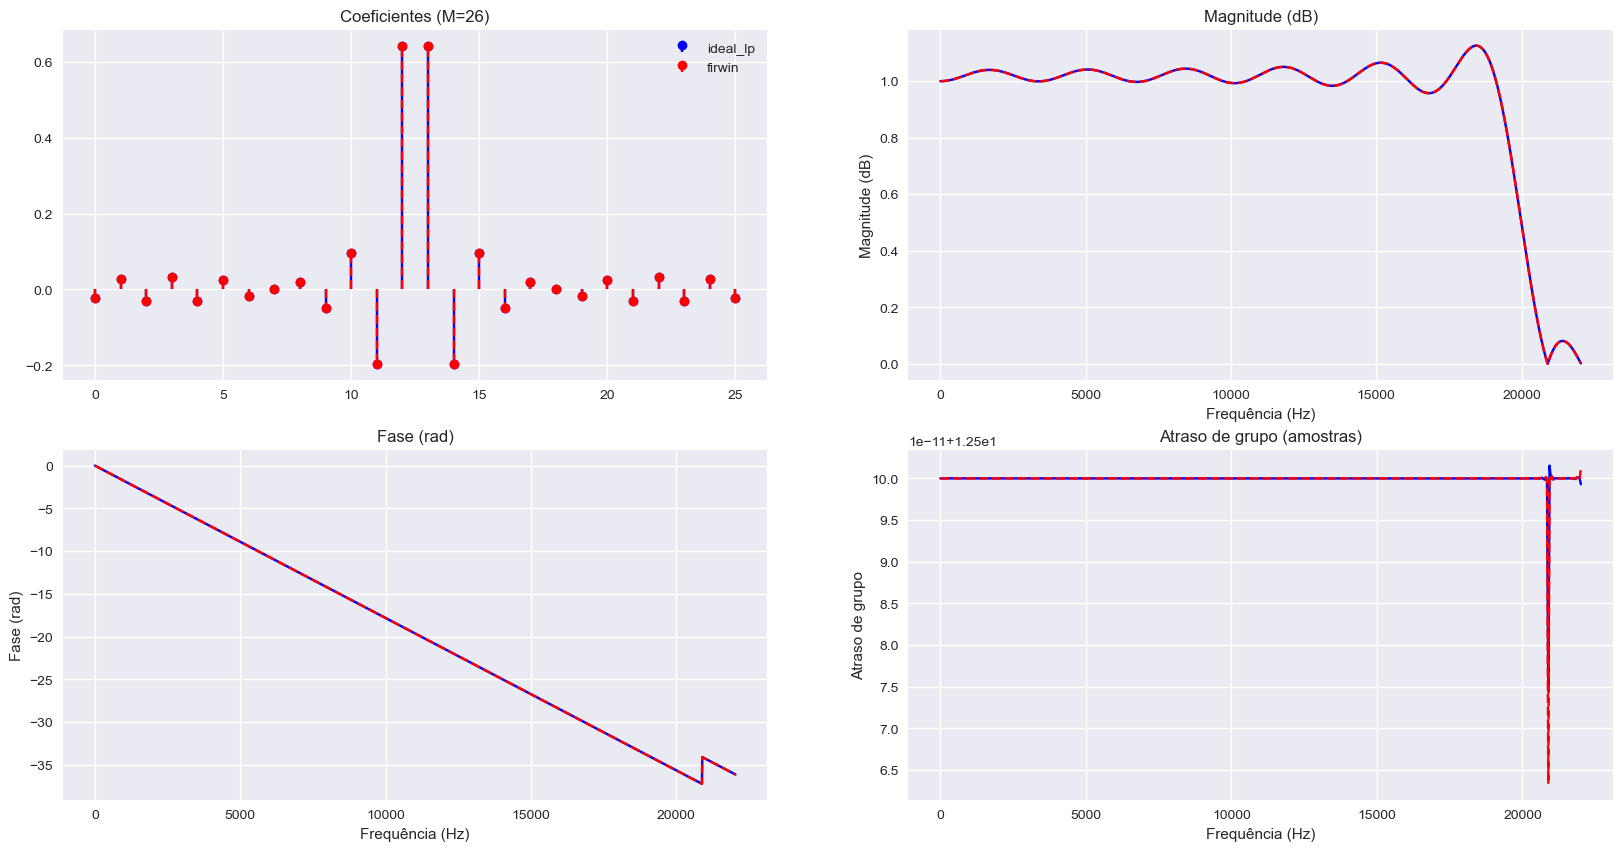

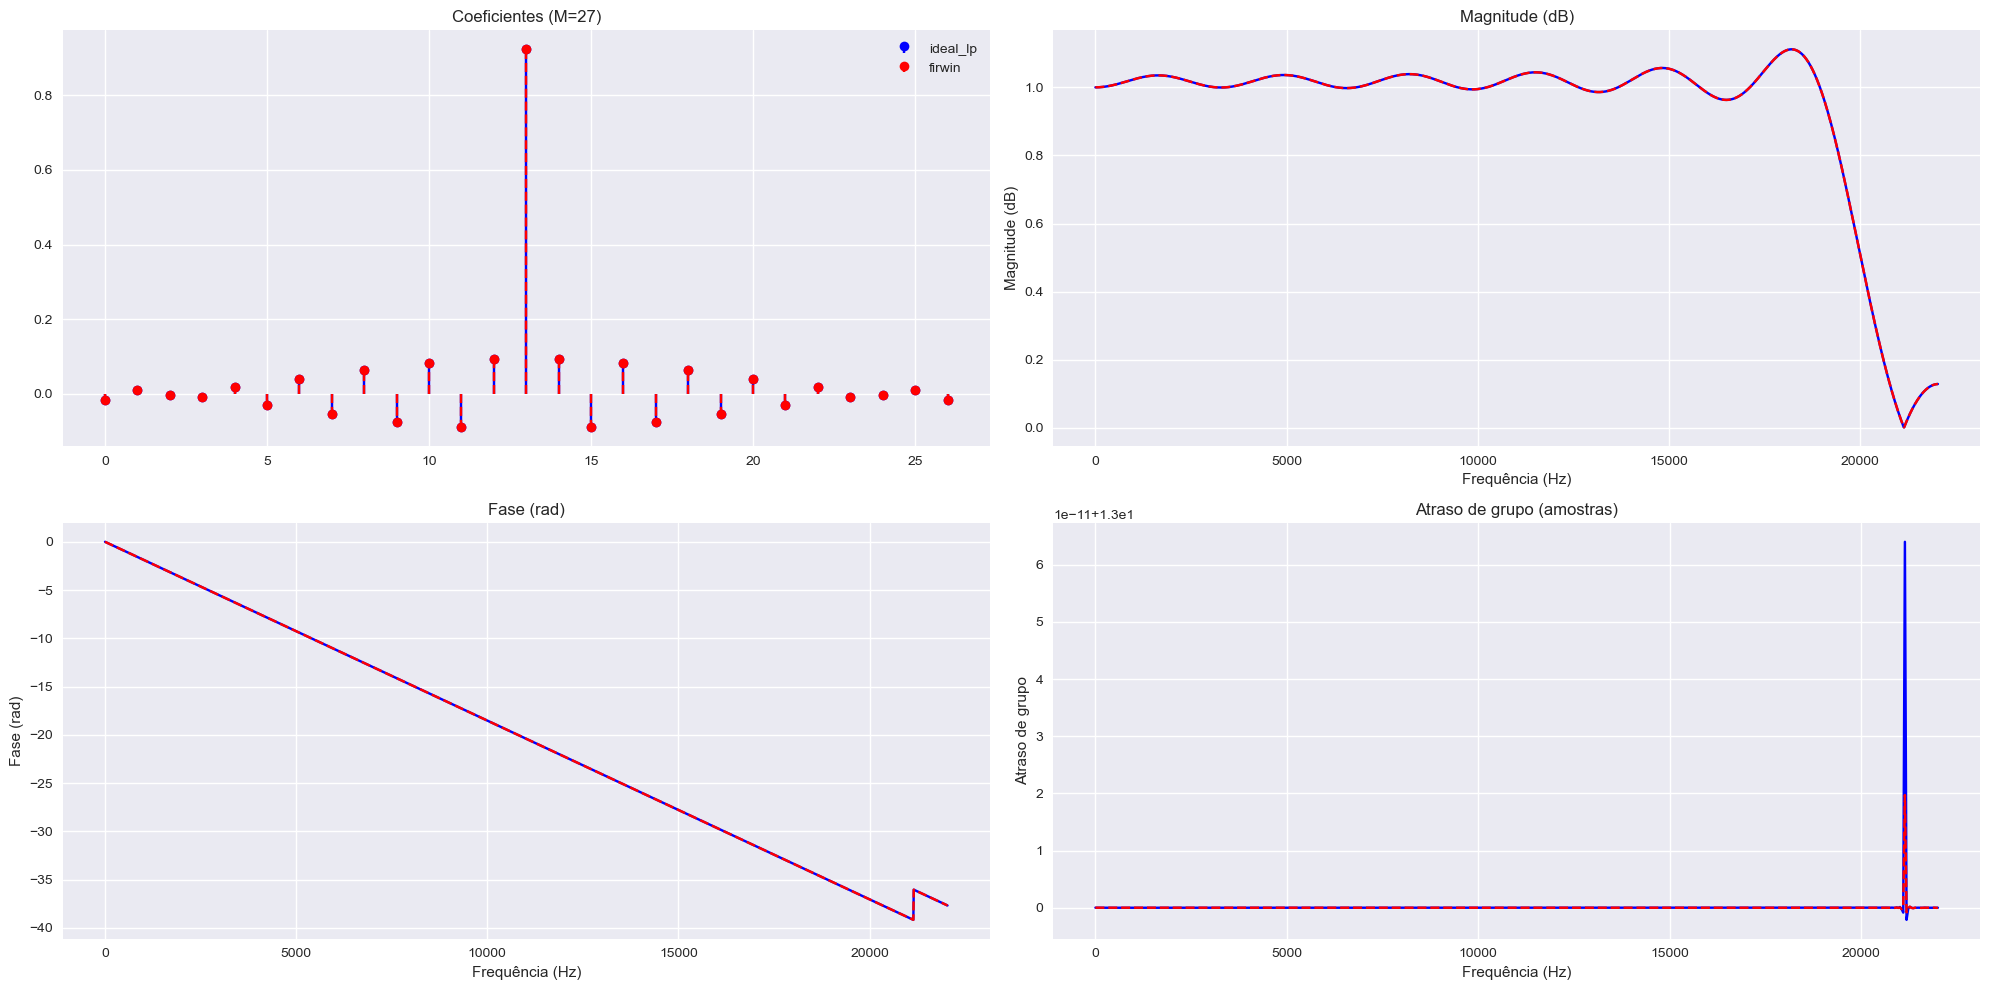

In [6]:
M_values = [26,27]  # Número de coeficientes do filtro
f_c = 20000 # Frequência de corte do filtro
f_s = 44100 # Frequência de amostragem
N_fft = 2048



for i, M in enumerate(M_values):
    # Coeficientes
    h_ideal = ideal_lp(f_c, f_s, M)
    h_firwin = firwin(M, cutoff=f_c, fs=f_s, window="boxcar", pass_zero=True)

    # Erro relativo
    erro = pds.rel_rmse(h_ideal, h_firwin)
    print(f"M = {M}\nErro relativo RMSE entre coeficientes= {erro:.6e}\n")

    # Resposta em frequência
    metrics_ideal = lp_freq_metrics(h_ideal, f_s, f_c, worN=N_fft)
    metrics_firwin = lp_freq_metrics(h_firwin, f_s, f_c, worN=N_fft)
    freqs = metrics_ideal['w']
    H_ideal = metrics_ideal['H']
    H_firwin = metrics_firwin['H']

    print("Métricas da resposta em frequência:\n")
    for key in metrics_ideal:
        try:
            print(f"  {key:15s}: {metrics_ideal[key]:.6f} (implementada)  {metrics_firwin[key]:.6f} (firwin)")
        except TypeError:
            pass  # ignora arrays ou tipos não formatáveis
    
    print("\n")

    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    # Plot coeficientes
    ax = axes[0, 0]
    ax.stem(h_ideal, linefmt="b-", markerfmt="bo", basefmt=" ")
    ax.stem(h_firwin, linefmt="r--", markerfmt="ro", basefmt=" ")
    ax.set_title(f"Coeficientes (M={M})")
    ax.legend(["ideal_lp", "firwin"])

    # Plot magnitude da resposta em frequência
    ax = axes[0, 1]
    ax.plot(freqs, (np.abs(H_ideal)+1e-12), "b")
    ax.plot(freqs, (np.abs(H_firwin)+1e-12), "r--")
    ax.set_title("Magnitude (dB)")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.grid(True)

    # Plot fase da resposta em frequência
    ax = axes[1, 0]
    ax.plot(freqs, np.unwrap(np.angle(H_ideal)), "b")
    ax.plot(freqs, np.unwrap(np.angle(H_firwin)), "r--")
    ax.set_title("Fase (rad)")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Fase (rad)")
    ax.grid(True)

    # Plot atraso de grupo
    ax = axes[1, 1]
    ax.plot(metrics_ideal['w_gd'], metrics_ideal['group_delay'], "b")
    ax.plot(metrics_firwin['w_gd'], metrics_firwin['group_delay'], "r--")
    ax.set_title("Atraso de grupo (amostras)")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Atraso de grupo")
    ax.grid(True)

plt.tight_layout()
plt.show()

## Janelamento de Hamming

In [28]:
@njit(parallel=True)
def hamming_window(M, alpha = 0.54):
    '''
    Função para gerar uma janela de Hamming.

    params:
        M: Número de pontos da janela.
        alpha: Parâmetro da janela de Hamming.

    returns:
        w: Janela de Hamming.
    '''
    n = np.arange(0, M)
    w = alpha + (1-alpha)*np.cos(2*np.pi*(n-(M-1)/2)/(M-1))
    return w


Erro relativo RMSE entre janelas de Hamming= 1.323183e-16



<StemContainer object of 3 artists>

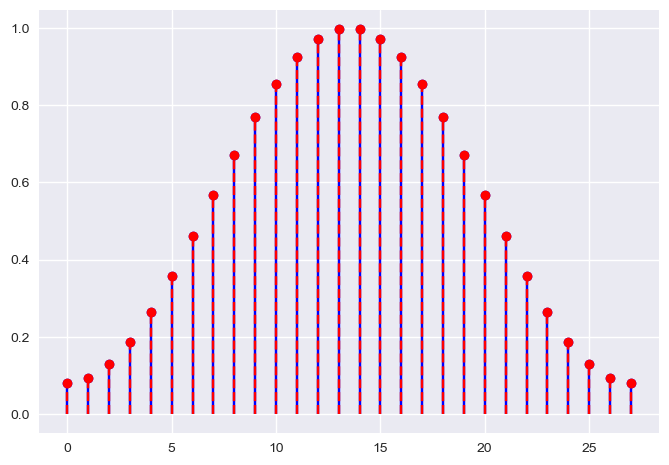

In [29]:
window = hamming_window(28)
window_sci = hamming(28)

err = pds.rel_rmse(window, window_sci)
print(f"Erro relativo RMSE entre janelas de Hamming= {err:.6e}\n")

plt.stem(window, linefmt="b-", markerfmt="bo", basefmt=" ")
plt.stem(window_sci, linefmt="r--", markerfmt="ro", basefmt=" ")

## Filtro FIR por janelamento

In [30]:
@njit(parallel=True)
def hamming_fir(f_c, f_s, M, alpha = 0.54):
    '''
    Função que calcula os coeficientes de um filtro fir passa-baixas utilizando janelamento de Hamming

    Args:
        f_c: Frequência de corte do filtro em Hz.
        f_s: Frequência de amostragem em Hz.
        M: Número de coeficientes do filtro.
        alpha: Parâmetro da janela de Hamming
    
    Returns:
        h_hamming: Coeficientes do filtro
    '''

    h = ideal_lp(f_c, f_s, M)
    window = hamming_window(M, alpha)

    h_hamming = h*window

    return h_hamming

## Filtragem dos sinais de áudio

In [106]:
def plot_spectrum(signal, fs, title):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, 1/fs)
    spectrum = np.abs(np.fft.rfft(signal))
    spectrum /= np.max(spectrum)
    spectrum_db = 20 * np.log10(spectrum + 1e-12)

    plt.figure(figsize=(10, 4))
    plt.plot(freqs, spectrum_db)
    plt.title(title)
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.tight_layout()
    plt.show()

def snr(ref, test):
    ref = ref.astype(np.float64)
    test = test.astype(np.float64)
    erro = ref - test
    return 10 * np.log10(np.sum(ref**2) / np.sum(erro**2))

def plot_spectrogram(signal, fs, title):
    f, t, Sxx = spectrogram(signal, fs)
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-12), shading='gouraud')
    plt.title(title)
    plt.xlabel("Tempo (s)")
    plt.ylabel("Frequência (Hz)")
    plt.colorbar(label="Magnitude (dB)")
    plt.tight_layout()
    plt.show()

def gerar_ruido_senoidal(fs, duracao, freq1=5800, freq2=6200, amp=600):
    t = np.linspace(0, duracao, int(fs * duracao), endpoint=False)
    senoide1 = amp * np.sin(2 * np.pi * freq1 * t)
    senoide2 = amp * np.sin(2 * np.pi * freq2 * t)
    return senoide1 + senoide2


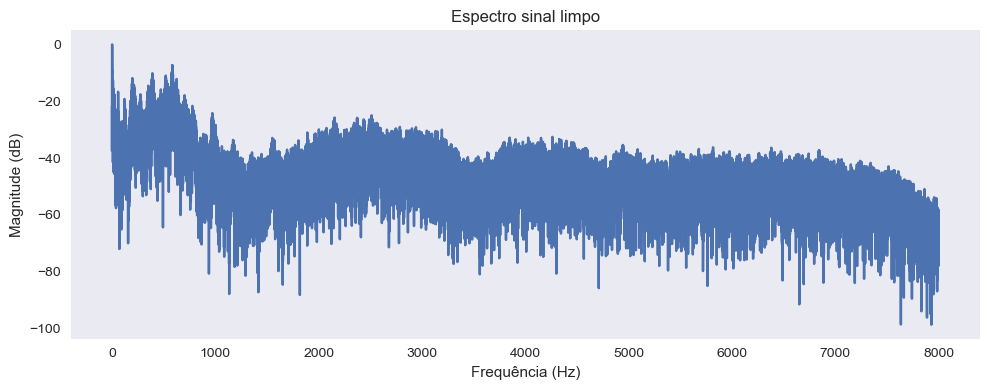

In [ ]:
# Áudio Limpo
fs_orig, audio_orig = wavfile.read("audio/audio_gravado.wav")
display(Audio(audio_orig, rate = fs_orig))
plot_spectrum(audio_orig, fs_orig, "Espectro sinal limpo")



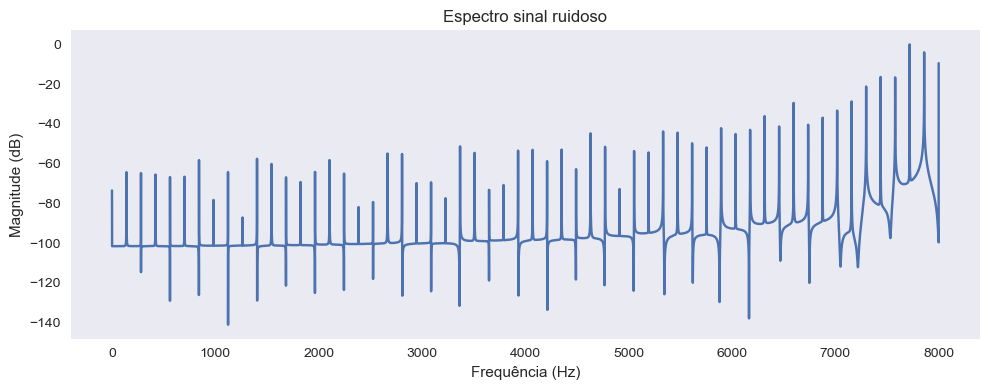

In [ ]:
# Ruído
fs_noise, audio_noise = wavfile.read("audio/audio_ruido.wav")
audio_noise = audio_noise.astype(np.float32)
audio_noise /= 3
display(Audio(audio_noise, rate = fs_noise))

plot_spectrum(audio_noise, fs_noise, "Espectro sinal ruidoso")

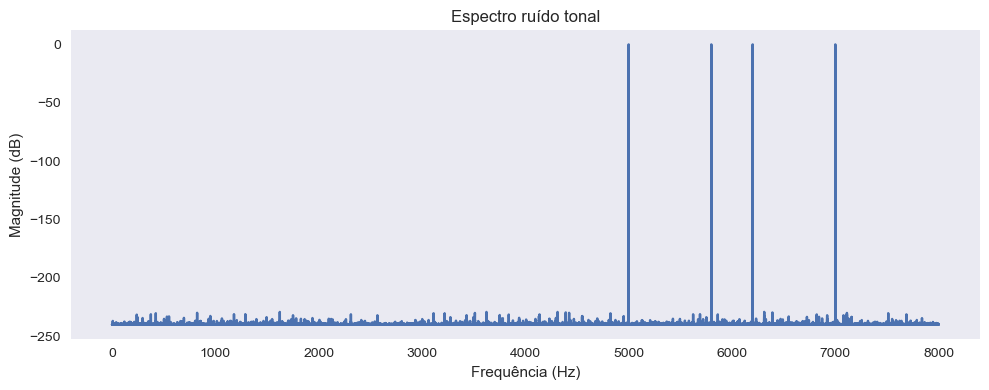

In [ ]:
# Ruído senoidal
duracao = len(audio_orig) / fs_orig
ruido_tonal = gerar_ruido_senoidal(fs_orig, duracao)
ruido_tonal2 = gerar_ruido_senoidal(fs_orig, duracao, freq1 = 5000, freq2 = 7000)
ruido_tonal += ruido_tonal2

display(Audio(ruido_tonal, rate = fs_orig))
plot_spectrum(ruido_tonal, fs_orig, "Espectro ruído tonal")

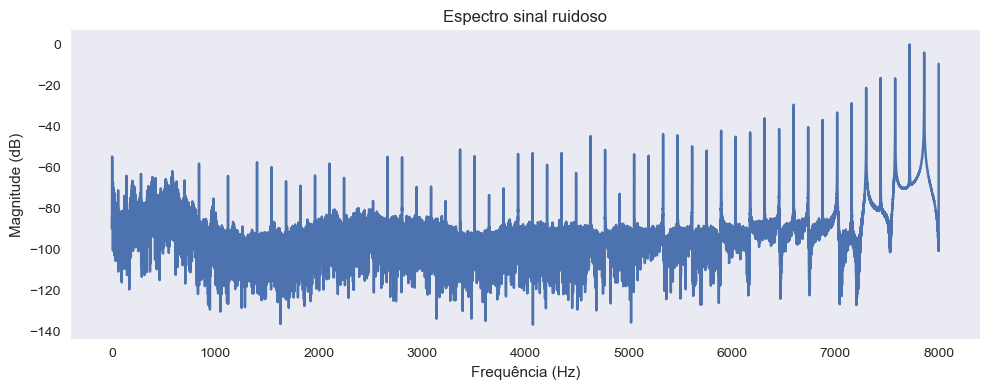

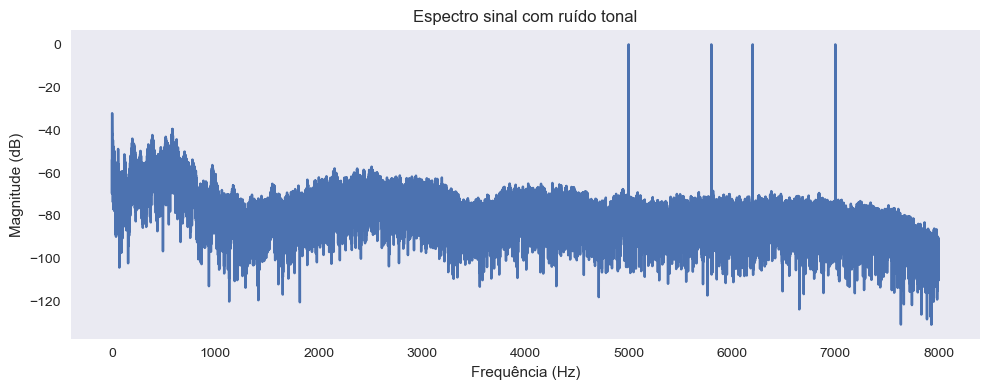

In [174]:
# Áudios ruidosos
audio_ruido = audio_orig + audio_noise
audio_ruido_tonal = audio_orig + ruido_tonal

# Áudio com ruído
display(Audio(audio_ruido, rate = fs_orig))
plot_spectrum(audio_ruido, fs_orig, "Espectro sinal ruidoso")

# Áudio com ruído tonal
display(Audio(audio_ruido_tonal, rate = fs_orig))
plot_spectrum(audio_ruido_tonal, fs_orig, "Espectro sinal com ruído tonal")

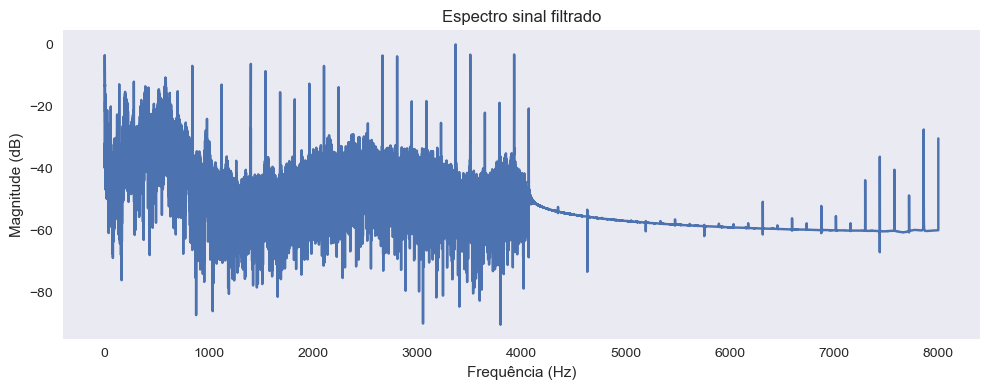

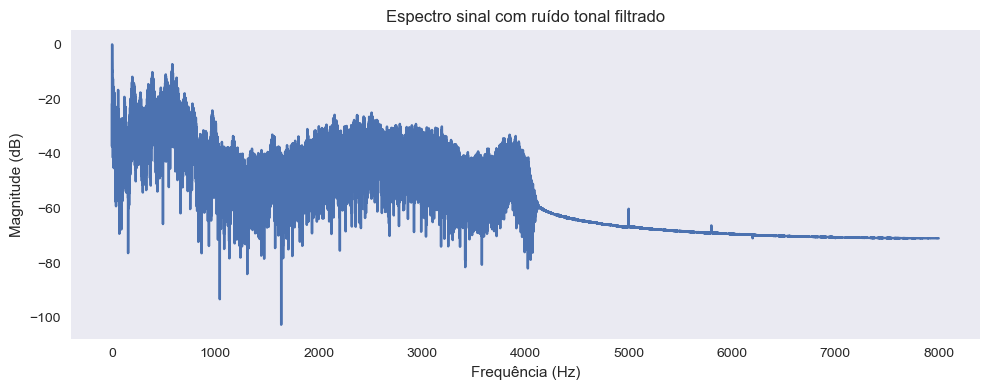

In [173]:
# Filtro passa-baixas
M = 201
f_c = 4000
h_filtro = hamming_fir(f_c = f_c, f_s = fs_orig, M = M)

# Sinal com ruído filtrado
sinal_filtrado = np.real(pds.Conv_sum_numba_parallel(audio_ruido, h_filtro, mode = 'same'))
display(Audio(sinal_filtrado, rate = fs_orig))
plot_spectrum(sinal_filtrado, fs_orig, "Espectro sinal filtrado")

# Sinal com ruído tonal filtrado
sinal_ruidotonal_filtrado = np.real(pds.Conv_sum_numba_parallel(audio_ruido_tonal, h_filtro, mode = 'same'))
display(Audio(sinal_ruidotonal_filtrado, rate = fs_orig))
plot_spectrum(sinal_ruidotonal_filtrado, fs_orig, "Espectro sinal com ruído tonal filtrado")

## 2.2 Filros IIR - Aproximação de Butterworth

O projeto de filtros digitais de resposta infinita ao impulso, em geral, tomam como base o projeto já conhecido de filtros analógicos. Após obter a função de transferência para o filtro analógico $H(s)$, transformamo-la para o domínio discreto $H(z)$ pelo mapeamento: $z = e^{s_kT_s}$, onde $s_k$ são os polos do sistema, e $T_s$ é o período de amostragem. Ou então pela aproximação bilinear: $s = \frac{2}{T_s}\frac{1-z^{-1}}{1+z^{-1}}$.
Primeiramentee, a apartir das especificações do projeto, serão calculados a ordem e a frequência de corte do filtro butterworth analógico passa-baixas. A partir desses valores, serão calculados os polos da função de transferência do filtro, e por último, será aplicada a aproximação bilinear de modo a obter a função de tranferência no domínio discreto.

In [ ]:
def butterworth_solver(fs, at_passband, at_stopband, passband, stopband):
    """
    Calcula a ordem do filtro (N) e a frequência de corte (Omega_c) para um filtro Butterworth analógico.

    Parâmetros:
        fs (float): Frequência de amostragem.
        at_passband (float): Atenuação na banda de passagem (linear).
        at_stopband (float): Atenuação na banda de rejeição (linear).
        passband (float): Frequência de passagem normalizada (0 a pi).
        stopband (float): Frequência de rejeição normalizada (0 a pi).

    Retorna:
        tuple: Ordem do filtro (N) e frequência de corte (Omega_c).
    """
    def butterworth_equations(vars):
        N, Omega_c = vars
        if Omega_c <= 0 or N <= 0:
            return [1e6, 1e6]

        # Correção: transformação bilinear inversa sem np.pi
        wp = 2 * fs * np.tan(passband / 2)
        ws = 2 * fs * np.tan(stopband / 2)

        eq1 = 1 / np.sqrt(1 + (wp / Omega_c) ** (2 * N)) - at_passband
        eq2 = 1 / np.sqrt(1 + (ws / Omega_c) ** (2 * N)) - at_stopband
        return [eq1, eq2]

    initial_guess = [4, 1.0]
    result = least_squares(butterworth_equations, initial_guess, bounds=([1, 1e-3], [20, 1e3]))

    N, Omega_c = result.x
    N = int(np.ceil(N))
    return N, Omega_c


In [ ]:
fs = 1
at_passband = 0.89125       
at_stopband = 0.17783       
passband = 0.2 * np.pi
stopband = 0.3 * np.pi

# Chamada da função ajustada
N, Omega_c = butterworth_solver(fs, at_passband, at_stopband, passband, stopband)

print(f"Ordem do filtro (N): {N}")
print(f"Frequência de corte (Omega_c): {Omega_c:.5f}")

Ordem do filtro (N): 6
Frequência de corte (Omega_c): 0.73811
